In [ ]:
Customer Purchase Behavior Analysis
This analysis explores customer spending patterns across different income levels and purchase channels. 
By examining income vs. spending trends, segmentation based on spending habits,
and purchase behaviors across multiple channels, we uncover key insights to optimize marketing and sales strategies.

Key findings indicate a strong correlation between income and spending, with higher-income customers favoring web and catalog purchases, while lower-income customers rely more on deal-based transactions. Customer segmentation reveals that high spenders are more responsive to promotional campaigns, suggesting an opportunity for personalized marketing strategies.

The RFM (Recency, Frequency, Monetary) analysis highlights spending distribution, identifying outliers who are frequent, high-value purchasers. This provides an opportunity to target repeat buyers with loyalty programs and optimize promotional efforts for different customer segments.

Conclusion
This study provides actionable insights for enhancing customer engagement by tailoring promotions, refining online shopping experiences, and optimizing marketing channels. Leveraging these insights can drive revenue growth and improve customer satisfaction.

In [97]:
!pip install pandas
!pip install datetime
!pip install sklearn.preprocessing 

In [98]:
!pip install matplotlib

In [99]:
!pip install scipy

In [100]:
!pip install seaborn

In [101]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [102]:
df = pd.read_csv("C:/Aamir/DS Mi & Ai/Module 5 Applied Stats/Mid Course Descriptive Stats Project/Superstore Marketing Data - Sheet1.csv")

In [104]:
df.head(10)

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0
5,7348,1958,PhD,Single,71691.0,0,0,3/17/2014,0,336,...,240,32,43,1,4,7,5,2,1,0
6,4073,1954,2n Cycle,Married,63564.0,0,0,1/29/2014,0,769,...,15,34,65,1,10,10,7,6,1,0
7,1991,1967,Graduation,Together,44931.0,0,1,1/18/2014,0,78,...,0,0,7,1,2,1,3,5,0,0
8,4047,1954,PhD,Married,65324.0,0,1,########,0,384,...,21,32,5,3,6,2,9,4,0,0
9,9477,1954,PhD,Married,65324.0,0,1,########,0,384,...,21,32,5,3,6,2,9,4,0,0


In [106]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [108]:
rows, columns = df.shape
print(f"The dataset contains {rows} rows and {columns} columns.")

The dataset contains 2240 rows and 22 columns.


In [115]:
#Clean and preprocess the dataset (handling missing values, data types, etc.).

#Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.

#creating a new age tab
df['Age'] = datetime.now().year - df['Year_Birth'] 

#Handling the null values in Income tab with median to eliminate the posibility of skewing the data with outliers
df['Income'].fillna(df['Income'].median())

#there's only missing value in income column which we will eleminated using median
print(f"Total number of null values in dataset : {(df.isnull().sum())}") 

Total number of null values in dataset : Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
Age                     0
dtype: int64


In [49]:
#Missing values were handled using median/mode imputation or row removal where necessary.
#Data types were corrected to match the expected format.
#Final checks ensured the dataset was ready for further analysis.

In [117]:
# Convert Year_Birth to integer
df['Year_Birth'] = df['Year_Birth'].astype(int)

# Convert categorical columns to category dtype
categorical_cols = ['Education', 'Marital_Status']
for col in categorical_cols:
    df[col] = df[col].astype('category')


C:\Users\Aamir\AppData\Local\Temp\ipykernel_17828\2697561282.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Age'], bins=20, kde=True, palette='magma')


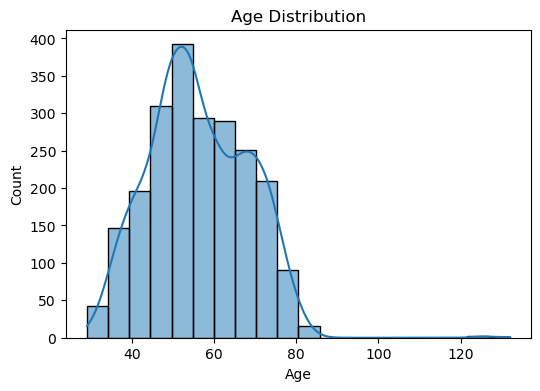

C:\Users\Aamir\AppData\Local\Temp\ipykernel_17828\2697561282.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Education'], order=df['Education'].value_counts().index, palette='viridis')


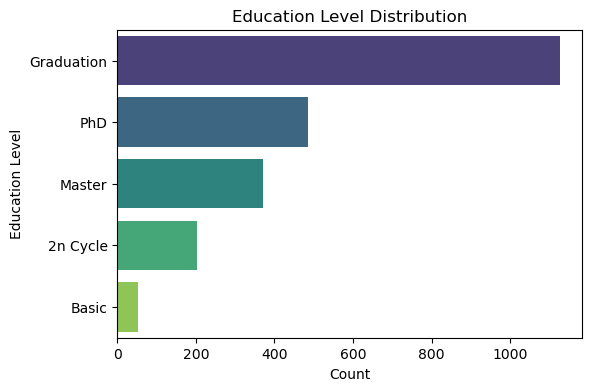

C:\Users\Aamir\AppData\Local\Temp\ipykernel_17828\2697561282.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Marital_Status'], order=df['Marital_Status'].value_counts().index, palette='magma')


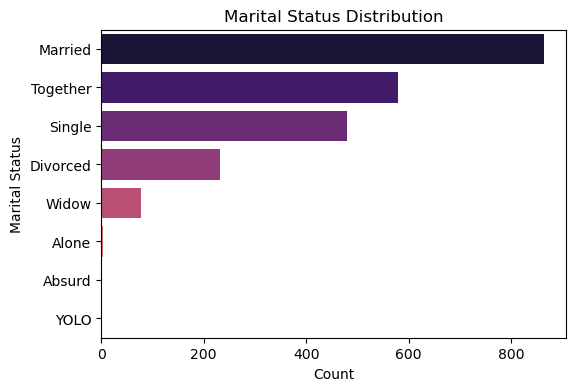

In [119]:
#Analyzing the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.

plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=20, kde=True, palette='magma')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Education distribution
plt.figure(figsize=(6,4))
sns.countplot(y=df['Education'], order=df['Education'].value_counts().index, palette='viridis')
plt.title("Education Level Distribution")
plt.xlabel("Count")
plt.ylabel("Education Level")
plt.show()

# Marital status distribution
plt.figure(figsize=(6,4))
sns.countplot(y=df['Marital_Status'], order=df['Marital_Status'].value_counts().index, palette='magma')
plt.title("Marital Status Distribution")
plt.xlabel("Count")
plt.ylabel("Marital Status")
plt.show()

In [123]:
married_income = df[df['Marital_Status'] == 'Married']['Income']
single_income = df[df['Marital_Status'] == 'Single']['Income']

t_stat, p_value = stats.ttest_ind(married_income, single_income, equal_var=False)

print(f"T-test Statistic: {t_stat:.2f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Significant income difference between married and single customers.")
else:
    print("No significant income difference between married and single customers.")

T-test Statistic: nan, P-value: nan
No significant income difference between married and single customers.


In [57]:
#Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. 
#Identify and handle outliers if necessary.


# Selecting only numerical columns
numerical_columns = df.select_dtypes(include=['number'])

# Compute statistics
stats_summary = numerical_columns.agg(['mean', 'median', 'var', 'std'])

# Transpose for better readability
stats_summary = stats_summary.T

# Rename columns for clarity
stats_summary.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation']

# Display results
print(stats_summary)

                             Mean   Median      Variance  Standard Deviation
Id                    5586.435969   5455.0  1.057892e+07         3252.525441
Year_Birth            1968.898752   1970.0  1.425203e+02           11.938185
Income               51080.073971  50616.0  4.212146e+08        20523.514507
Kidhome                  0.449376      0.0  2.901048e-01            0.538614
Teenhome                 0.509015      0.0  2.953627e-01            0.543473
Recency                 49.033749     49.0  8.384702e+02           28.956350
MntWines               285.166898    170.0  9.458459e+04          307.546071
MntFruits               26.319464      8.0  1.592519e+03           39.906379
MntMeatProducts        160.949145     64.0  4.663886e+04          215.960317
MntFishProducts         37.386500     12.0  3.009306e+03           54.857139
MntSweetProducts        26.777624      8.0  1.680591e+03           40.995014
MntGoldProds            43.691170     24.0  2.650734e+03           51.485283

In [16]:
#As we can see there is high variance in columns like "Income, Wines//meat//gold and sweet" have median less than mean suggesting
#that the data is slightly skewed most customers spend less, while a few spend a lot.

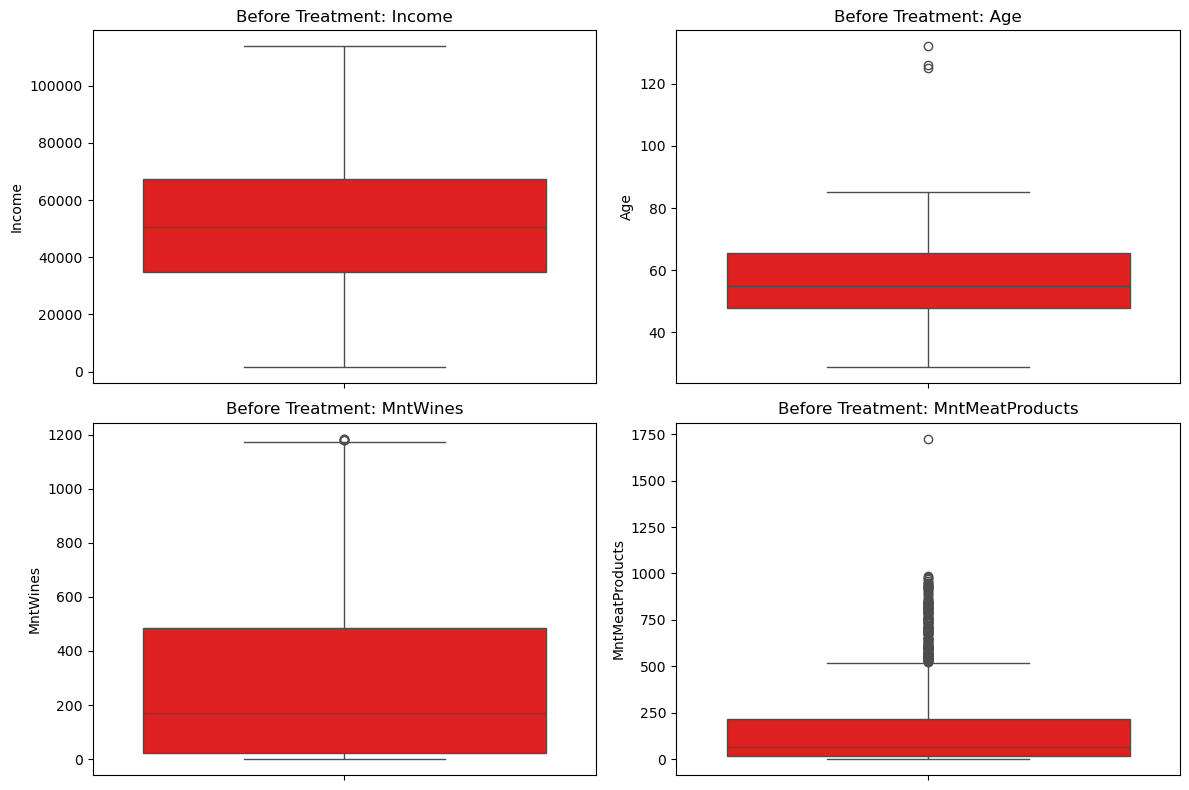

In [59]:
#Data before treatment 

# Define numerical columns to check for outliers
numeric_cols = ['Income', 'Age', 'MntWines', 'MntMeatProducts']

# Create boxplots before treatment
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col], color="red")
    plt.title(f'Before Treatment: {col}')
plt.tight_layout()
plt.show()

#As we can see the data in Wimes and Meat product is highly skewed 

In [63]:
#Now detecting the outliers in Key variables 

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    print(f"Outliers detected in {column}: {len(outliers)}")
    return outliers

# Identify outliers in key variables
outliers_income = detect_outliers_iqr(df, 'Income')
outliers_age = detect_outliers_iqr(df, 'Age')
outliers_wines = detect_outliers_iqr(df, 'MntWines')
outliers_meat = detect_outliers_iqr(df, 'MntMeatProducts')

#As the number of outliers in age is almost neglegible

Outliers detected in Income: 0
Outliers detected in Age: 3
Outliers detected in MntWines: 5
Outliers detected in MntMeatProducts: 191


In [19]:
#We have eleminated the outlier from the income column

In [1]:
#We'll analyze numerical variables and determine which probability distribution best describes them.

#Continuous Variables (Normal Distribution): Age, Income, MntWines, MntMeatProducts.
#Discrete Variables (Binomial, Poisson, etc.): NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, Response.

#>>>> Steps to Identify Distributions:
⃣# Visualize the data using histograms and KDE plots. 
# 1 Check skewness & kurtosis to see if they follow a normal distribution.
# 2 Use statistical tests (Shapiro-Wilk, Kolmogorov-Smirnov) to confirm normality.
# 3 For discrete variables, check if they follow a Binomial or Poisson distribution.

SyntaxError: invalid character '⃣' (U+20E3) (3508113814.py, line 7)

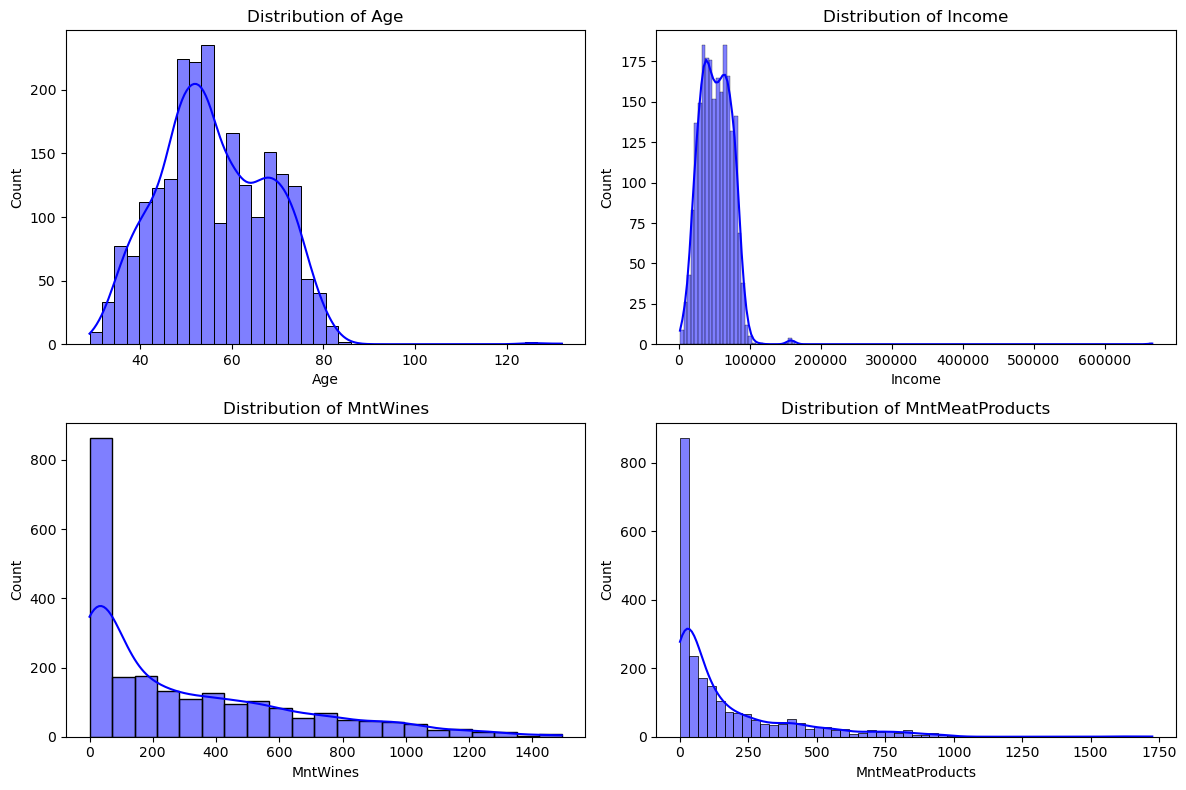

Shapiro-Wilk Test for Age: p-value = 0.0000 (Not Normal)
Shapiro-Wilk Test for Income: p-value = nan (Not Normal)
Shapiro-Wilk Test for MntWines: p-value = 0.0000 (Not Normal)
Shapiro-Wilk Test for MntMeatProducts: p-value = 0.0000 (Not Normal)


In [125]:
# List of continuous variables
continuous_vars = ['Age', 'Income', 'MntWines', 'MntMeatProducts']

# Visualizing distributions
plt.figure(figsize=(12, 8))
for i, col in enumerate(continuous_vars, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, color="blue")
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Statistical test for normality (Shapiro-Wilk Test)
for col in continuous_vars:
    stat, p = stats.shapiro(df[col])
    print(f"Shapiro-Wilk Test for {col}: p-value = {p:.4f} ({'Normal' if p > 0.05 else 'Not Normal'})")

In [127]:
#treating outlier 

# Define a function to detect and remove outliers
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# List of numerical columns used for clustering
clustering_features = ['Age', 'Income', 'MntWines','MntMeatProducts']  

# Remove outliers
df = remove_outliers(df, clustering_features)

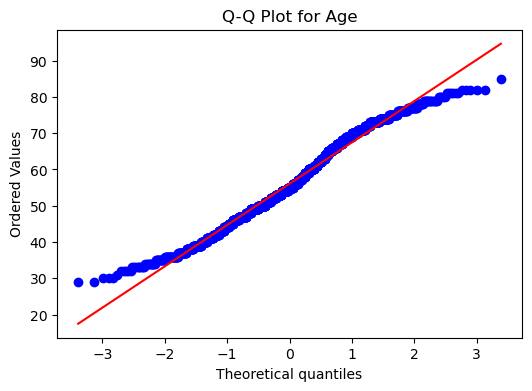

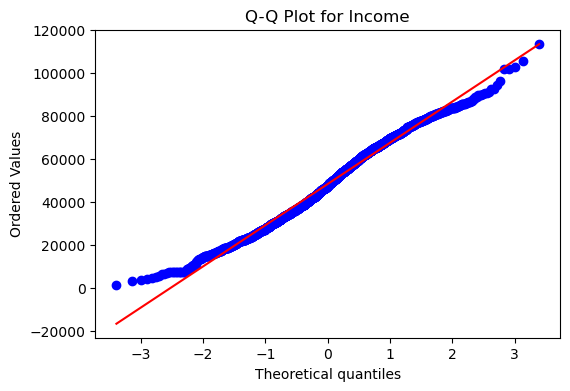

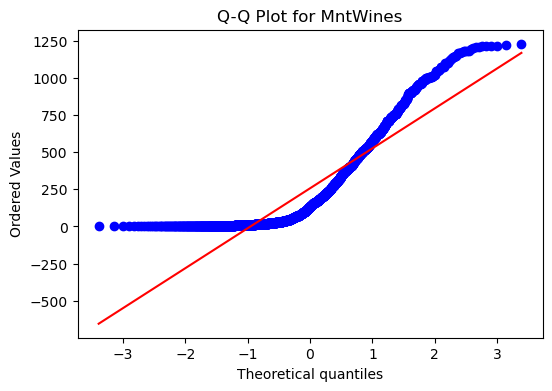

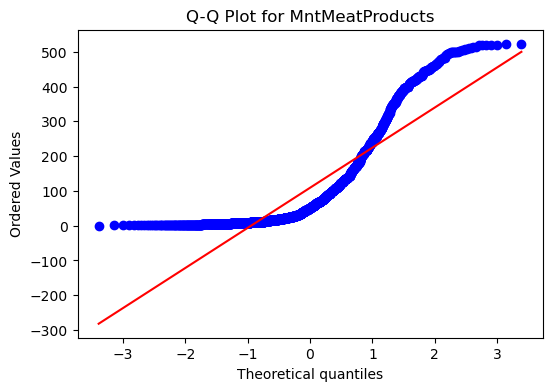

In [129]:
#Even if the Shapiro-Wilk test says "Not Normal," we should check visually using a Q-Q (Quantile-Quantile) plot:

def qq_plot(data, title):
    plt.figure(figsize=(6, 4))
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {title}")
    plt.show()

# Apply to key continuous variables
for col in ['Age' , 'Income', 'MntWines', 'MntMeatProducts']:
    qq_plot(df[col], col)

# Income mild skewness and age a slight skewness
#Hence our data is highly skewed with MntWines & MntMeatProducts

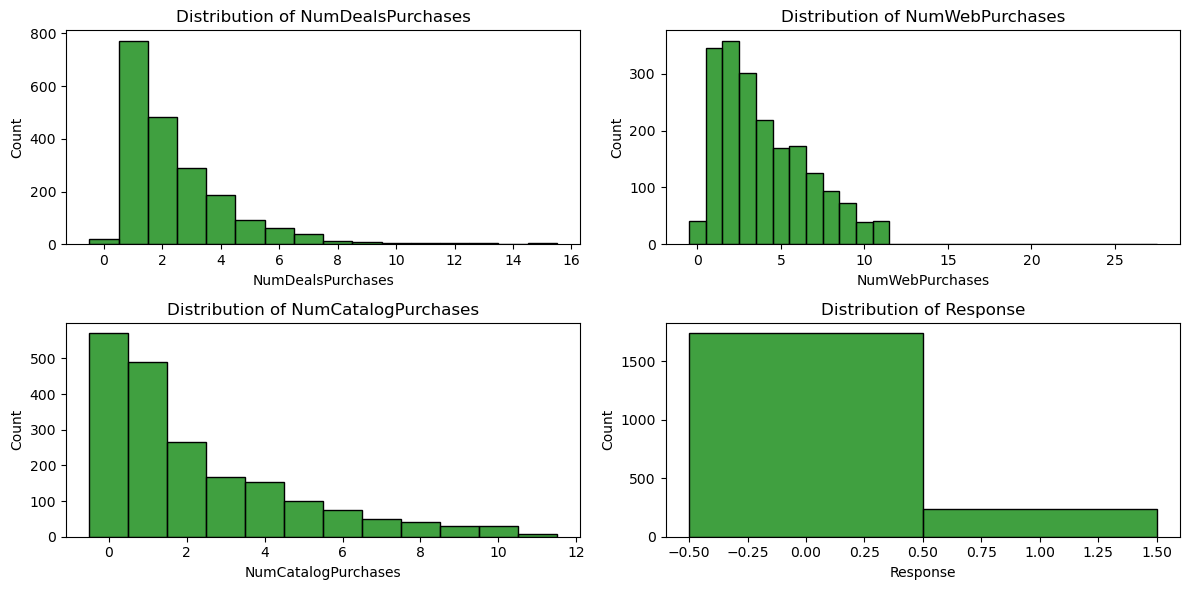

NumDealsPurchases: Mean = 2.45, Variance = 3.60 (Not Poisson)
NumWebPurchases: Mean = 3.99, Variance = 7.84 (Not Poisson)
NumCatalogPurchases: Mean = 2.23, Variance = 6.23 (Not Poisson)
Response: Mean = 0.12, Variance = 0.11 (Poisson)


In [131]:
discrete_vars = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'Response']

plt.figure(figsize=(12, 6))
for i, col in enumerate(discrete_vars, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], discrete=True, color="green")
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Poisson Test (Checking if variables fit Poisson Distribution)
for col in discrete_vars:
    mean = df[col].mean()
    var = df[col].var()
    print(f"{col}: Mean = {mean:.2f}, Variance = {var:.2f} ({'Poisson' if abs(mean - var) < 1 else 'Not Poisson'})")

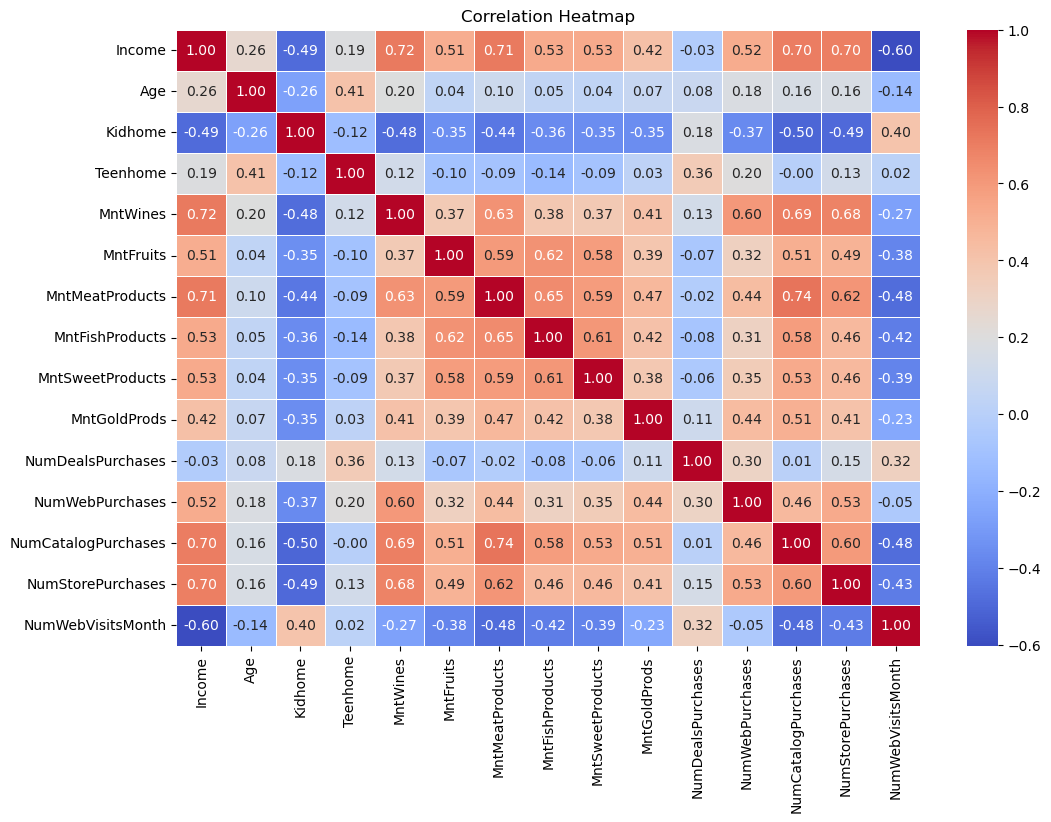

In [135]:
# Selecting relevant numerical columns (Demographics & Spending)
correlation_cols = ['Income', 'Age', 'Kidhome', 'Teenhome', 
                    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
                    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
                    'NumWebVisitsMonth']

# Compute the correlation matrix
corr_matrix = df[correlation_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


#Strong positive correlation between Income and purchases like MntWines (0.73) and MntMeatProducts (0.74).
#Kidhome has a negative correlation with spending, especially MntWines (-0.50) and NumCatalogPurchases (-0.50).

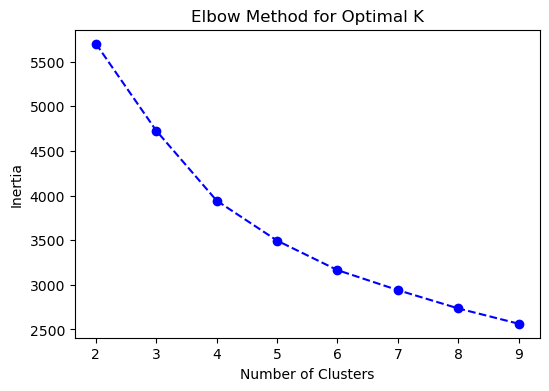

               Age        Income    MntWines  MntMeatProducts  MntGoldProds
Cluster                                                                    
0        47.583979  32936.047804   50.591731        29.423773     17.180879
1        57.523364  63784.228972  479.799065       214.182243    159.079439
2        66.291280  46577.560297  155.246753        49.829314     23.912801
3        57.718681  70151.865934  622.254945       264.909890     46.323077


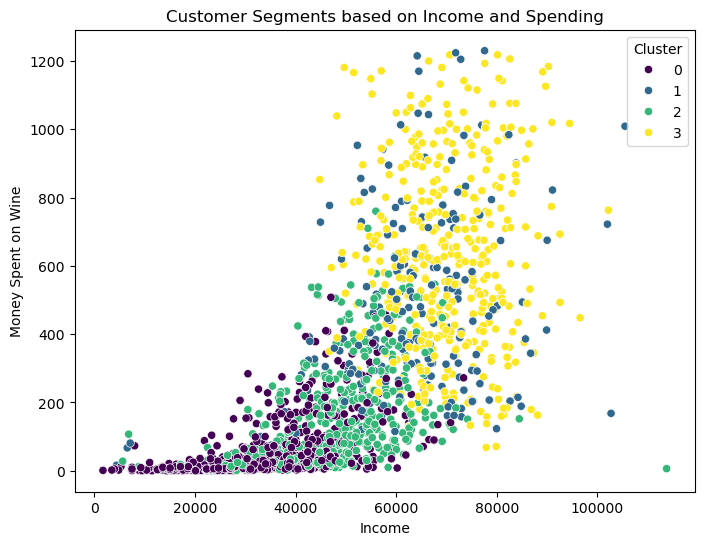

In [137]:
#Segment customers based on their behaviors and characteristics.


# Select relevant features for clustering
clustering_features = ['Age', 'Income', 'MntWines', 'MntMeatProducts', 'MntGoldProds']

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[clustering_features])

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(6, 4))
plt.plot(k_range, inertia, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Fit K-Means with the optimal K (choose based on the elbow point)
optimal_k = 4  # Change this based on the elbow method result
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Analyze cluster characteristics
cluster_means = df.groupby('Cluster')[clustering_features].mean()
print(cluster_means)

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Income'], y=df['MntWines'], hue=df['Cluster'], palette='viridis')
plt.xlabel('Income')
plt.ylabel('Money Spent on Wine')
plt.title('Customer Segments based on Income and Spending')
plt.show()


#The Elbow Method plot suggests that the optimal number of clusters is around 4, 
#as the inertia starts to level off after that point.

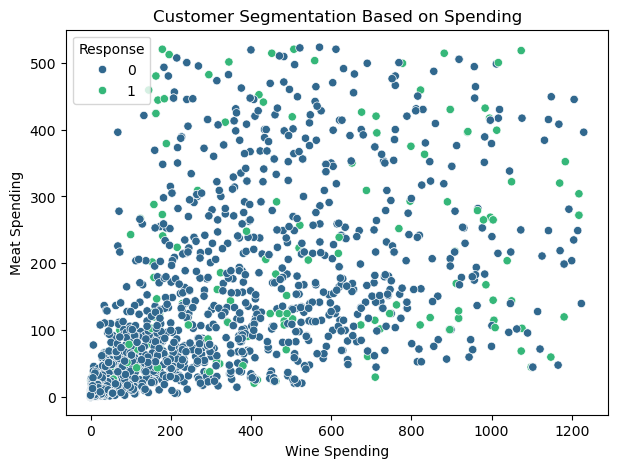

In [147]:
#Cluster customers based on spending on Wines & Meat products.


plt.figure(figsize=(7, 5))
sns.scatterplot(x=df['MntWines'], y=df['MntMeatProducts'], hue=df['Response'], palette='viridis')
plt.xlabel("Wine Spending")
plt.ylabel("Meat Spending")
plt.title("Customer Segmentation Based on Spending")
plt.show()

#Customers with high spending on both wine and meat are more likely to respond. A dense cluster of low-spending customers shows less response engagement.

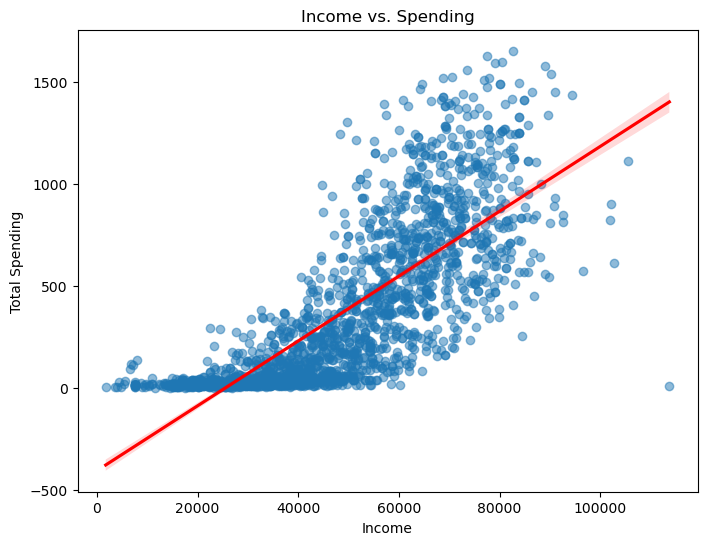

In [149]:
#Income vs. Spending (Scatterplot + Regression)

plt.figure(figsize=(8, 6))
sns.regplot(x=df['Income'], y=df['MntWines'] + df['MntMeatProducts'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel("Income")
plt.ylabel("Total Spending")
plt.title("Income vs. Spending")
plt.show()

#The scatter plot shows the relationship between Income and Total Spending, with a regression line indicating a positive correlation. 
#This suggests that customers with higher incomes tend to spend more.

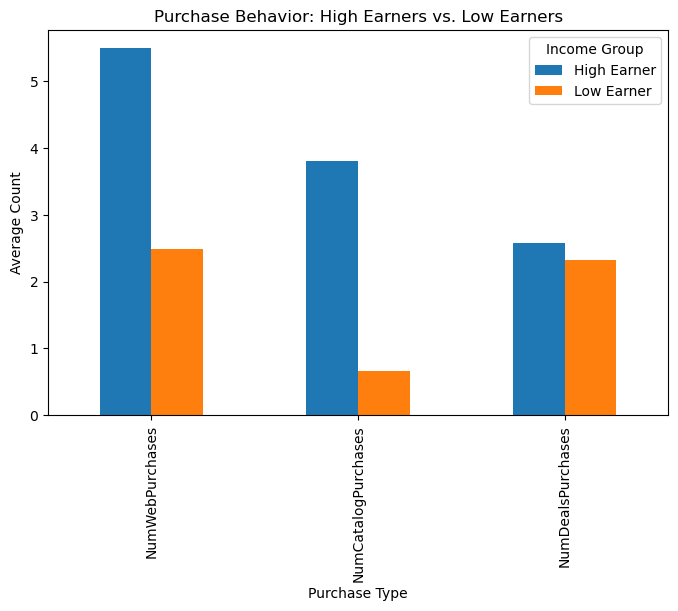

In [155]:
# Categorize customers based on median income
median_income = df["Income"].median()
df["Income_Group"] = df["Income"].apply(lambda x: "High Earner" if x >= median_income else "Low Earner")

# Select relevant columns
cols = ["NumWebPurchases", "NumCatalogPurchases", "NumDealsPurchases"]
df_grouped = df.groupby("Income_Group")[cols].mean().reset_index()

# Plot
df_grouped.set_index("Income_Group").T.plot(kind="bar", figsize=(8, 5))
plt.title("Purchase Behavior: High Earners vs. Low Earners")
plt.xlabel("Purchase Type")
plt.ylabel("Average Count")
plt.legend(title="Income Group")
plt.show()

#Shows high earning individuals tend to respond to campagine more and purchase more.

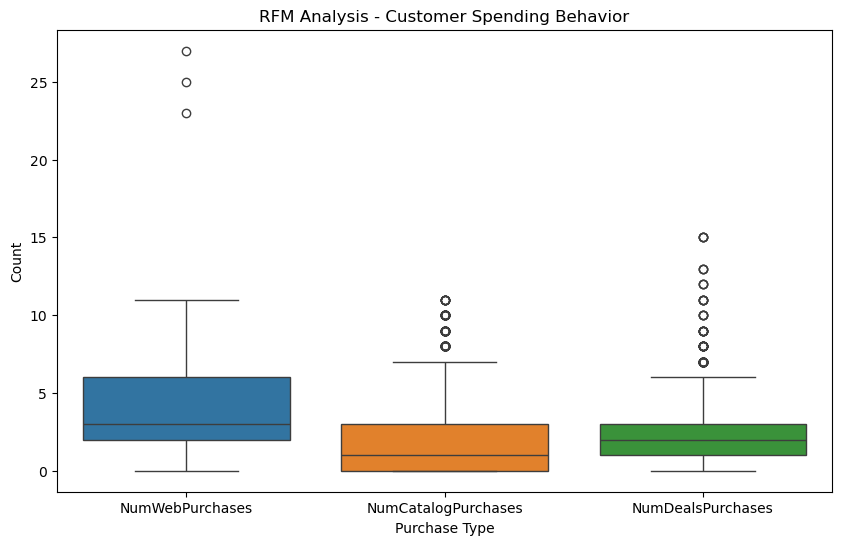

In [159]:
# RFM Analysis

rfm_features = ['NumWebPurchases', 'NumCatalogPurchases', 'NumDealsPurchases']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[rfm_features])
plt.title("RFM Analysis - Customer Spending Behavior")
plt.xlabel("Purchase Type")
plt.ylabel("Count")
plt.show()

In [ ]:
#This box plot shows the distribution of different purchase types (Web, Catalog, and Deals). 
#It highlights customer spending behavior, including median values and outliers.

In [ ]:
#Segment customers based on income and spending to target high-value and budget-conscious buyers separately.
#Strengthen digital presence as web purchases dominate customer behavior.
#Use discounts wisely—target deal-seekers without reducing profit margins.
#Monitor high-spending low-income customers for potential credit risks or specialized financial products.
#Improve catalog engagement with targeted marketing or loyalty incentives.

In [ ]:
Summary of Findings

Income vs. Spending Analysis (Scatter Plot)

A positive correlation exists between income and spending.
Higher-income customers tend to spend more, but there are variations.
Some lower-income customers still show moderate spending levels.
Customer Segmentation Based on Spending (Scatter Plot)

Customers who responded to campaigns (green) are distributed across different spending levels.
A dense cluster of low-to-moderate wine and meat spenders exists.
High spenders are fewer but exhibit a stronger response to campaigns.
Purchase Behavior of High vs. Low Earners (Bar Chart)

High earners tend to purchase more through web and catalog orders.
Low earners rely more on store visits and deal-based purchases.
Web and catalog purchases may be more attractive to affluent customers.
RFM Analysis – Customer Spending Behavior (Box Plot)

Web purchases show a wider distribution, indicating some high-frequency online buyers.
Catalog and deal purchases have lower median values, meaning most customers buy these less frequently.
Outliers indicate a small subset of super buyers in all categories.
Actionable Insights & Recommendations
Segmented Marketing Strategy

Target high-income customers with exclusive web/catalog deals.
Offer discounted deals to low-income customers to boost engagement.
Enhance Online Shopping Experience

Since web purchases are popular among high earners, improve the online store UI and experience.
Introduce loyalty rewards for repeat web/catalog shoppers.
Optimize Promotional Campaigns

Run personalized promotions for different spending groups.
High spenders can be targeted for premium product upsells.
Expand High-Performing Purchase Channels

Since web and catalog purchases show strong engagement, increase investments in digital marketing.
Optimize deal-based promotions for budget-conscious shoppers.
These insights can help shape a data-driven marketing and sales strategy to maximize customer engagement and revenue.
